In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn import datasets


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Load and read the dataset
from sklearn.datasets import load_iris
iris_data = load_iris()


In [5]:
iris_data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [8]:
df.shape

(150, 4)

In [9]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


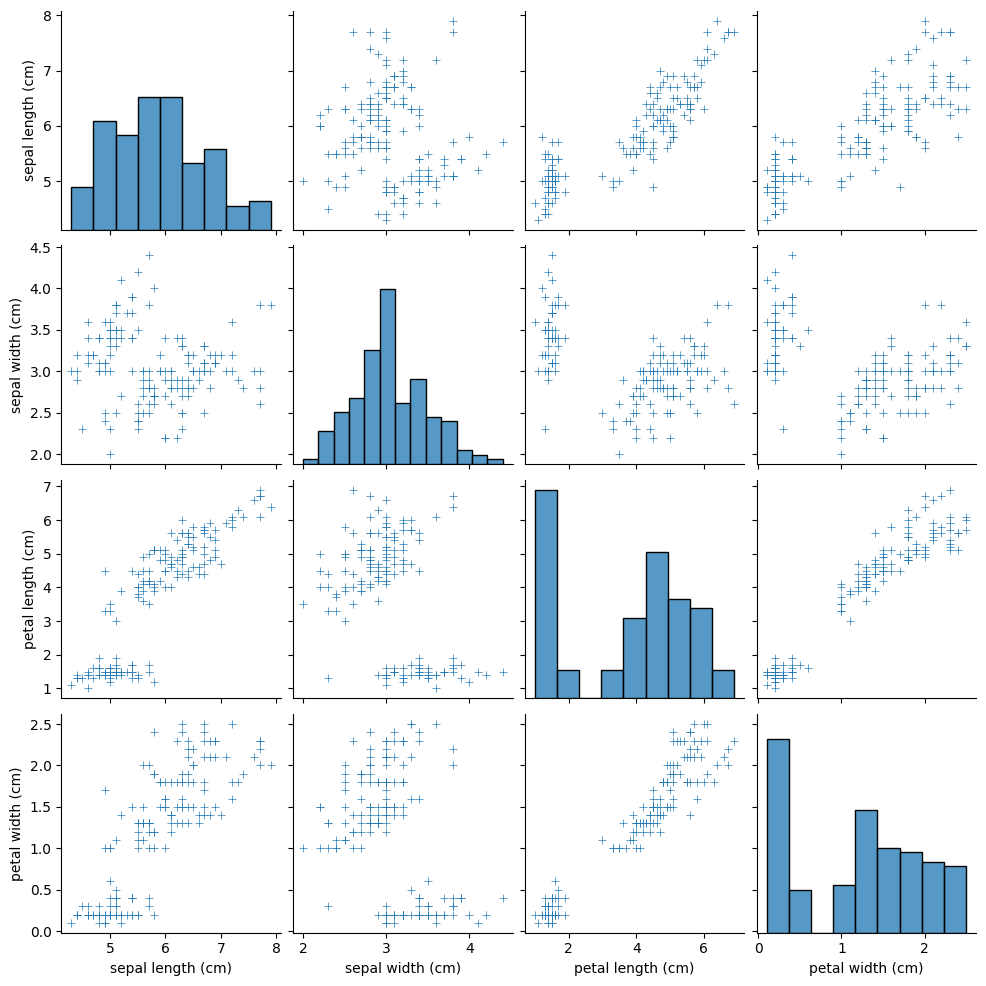

In [12]:
sns.pairplot(df, markers= '+')
plt.show()

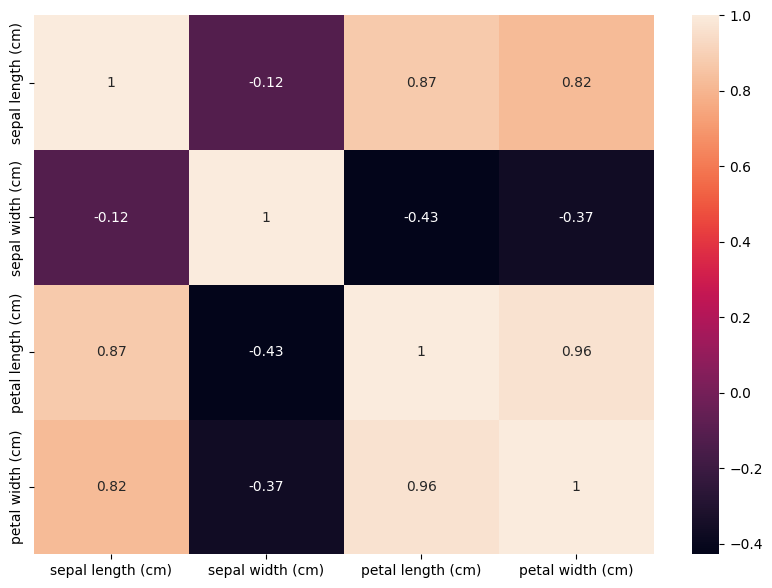

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

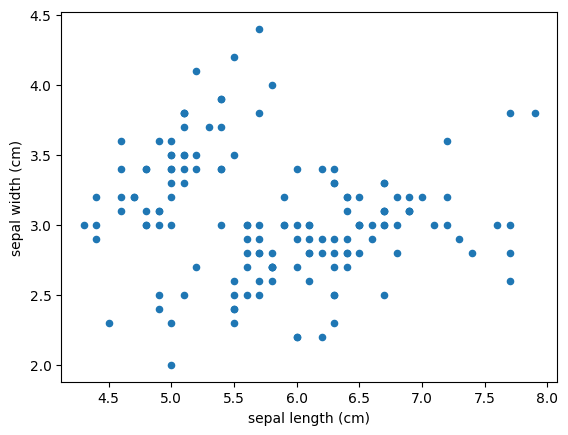

In [14]:
df.plot(kind= 'scatter', x= 'sepal length (cm)', y= 'sepal width (cm)')
plt.show()

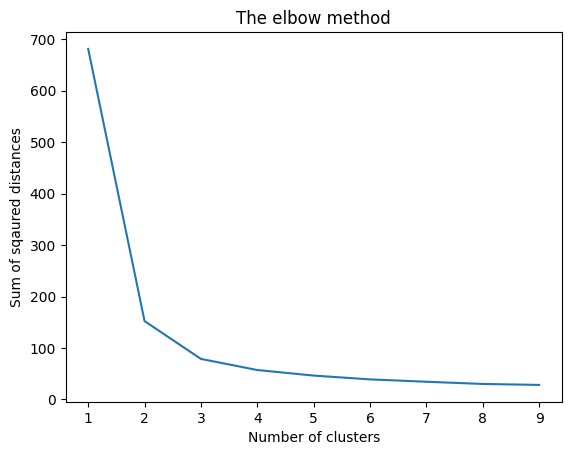

In [15]:
wss = []
for i in range (1,10):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42 )
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
plt.plot(range(1,10), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sqaured distances')
plt.show()

In [16]:
for i in range (2,10):
    kmeans = KMeans(n_clusters= i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print('For cluster: {}, the silhouette score is: {}'. format(i,score))

For cluster: 2, the silhouette score is: 0.6810461692117462
For cluster: 3, the silhouette score is: 0.5528190123564095
For cluster: 4, the silhouette score is: 0.49805050499728737
For cluster: 5, the silhouette score is: 0.48874888709310566
For cluster: 6, the silhouette score is: 0.36483400396700255
For cluster: 7, the silhouette score is: 0.3475042328046161
For cluster: 8, the silhouette score is: 0.3500602959686737
For cluster: 9, the silhouette score is: 0.33289939008555164


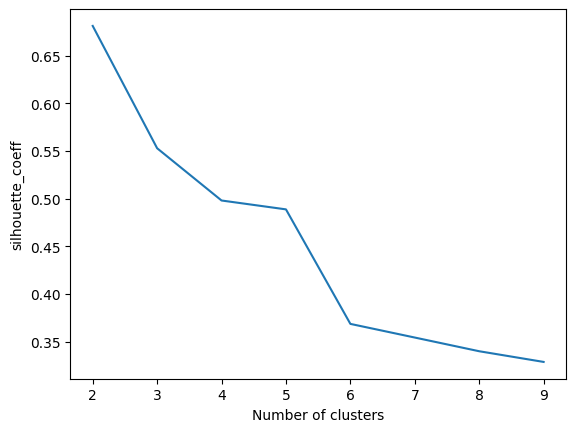

In [21]:
silhouette_coeff = []
for i in range (2,10):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coeff.append(score)
plt.plot(range(2,10), silhouette_coeff)
plt.xticks(range(2,10))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coeff')
plt.show()



In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [24]:
kmeans = KMeans(n_clusters = 3)
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

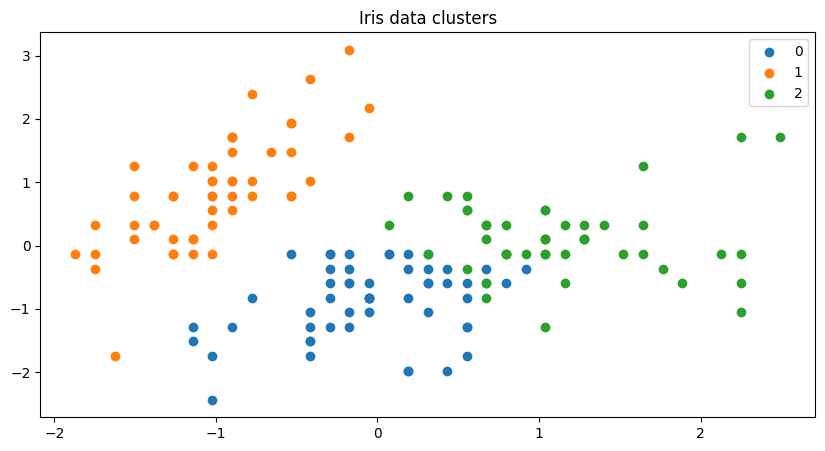

In [27]:
plt.figure(figsize=(10,5))
for i in unique_labels:
    plt.scatter(X[y==i, 0], X[y==i, 1], label=i)
plt.title('Iris data clusters')
plt.legend()
plt.show()